In [1]:
from pathlib2 import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from gpfit.fit import fit

In [2]:
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 160
mpl.rcParams['figure.dpi'] = 160

In [3]:
p = Path("SMAD_tables.xlsx")

In [4]:
dragtable = pd.read_excel(str(p), sheet_name="Drag")

In [5]:
H = dragtable["Scale Height"][2:].values

In [6]:
H = dragtable["Scale Height"][2:].values
h = dragtable["Altitude [m]"].values[2:].astype(float)
rho = dragtable["Unnamed: 3"].values[2:].astype(float)
hi = np.linspace(min(h), max(h), 1000)

In [7]:
rho = dragtable["Unnamed: 3"].values[2:].astype(float)

In [8]:
hi = np.linspace(min(h), max(h), 1000)

In [9]:
from scipy.interpolate import interp1d

In [10]:
rhoi = np.power(10, np.interp(hi, h, np.log10(rho)))
Hi = interp1d(h, H, kind='cubic')(hi)

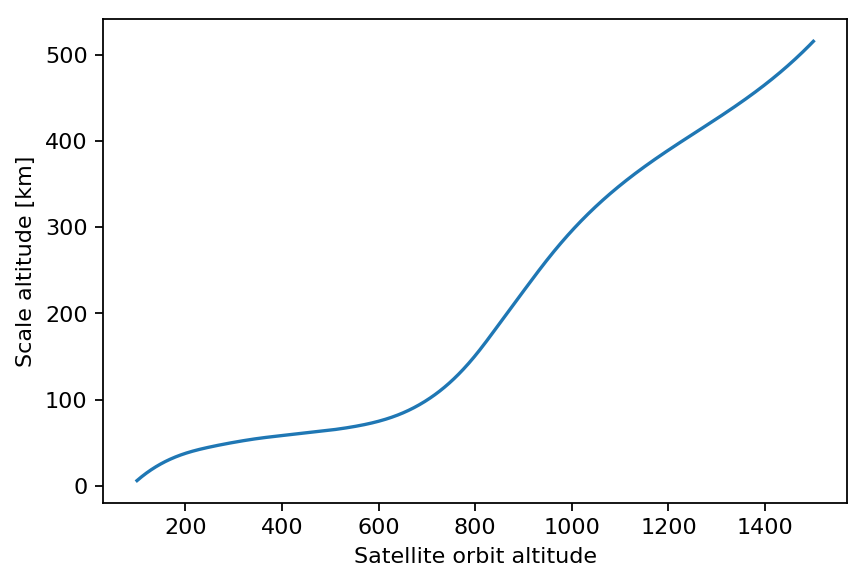

In [11]:
plt.plot(hi, Hi, '-')
plt.xlabel('Satellite orbit altitude')
plt.ylabel('Scale altitude [km]')
plt.show()

In [159]:
m = 38.879913747216605
CD = 2.2
A = 0.05261451671609104
R = 6378e3
bc1 = m/(CD*A)
bc2 = 85.
ai = R+hi*1000
year = 3600*24*365
mu = 3.98e14
ar = 2*np.pi*rhoi*ai**2/bc1
Ln = 1000*Hi*m/(2*np.pi*rhoi*ai**2*CD*A)/(3600*24*365) #*2*np.pi*np.sqrt(ai**3/mu)

In [163]:
hi[810]

1235.135135135135

In [162]:
Ln[810]

10.042491825744053

In [165]:
np.exp(2.3)

9.9741824548147182

In [164]:
#mP = 10*mp
-log(3600*24*365) + log(400.41e3) + log(m) - log(2*np.pi) - log(CD) - log(A) - 2*log(ai[810]) - log(1.1714883839346149e-15)

2.3022406313904966

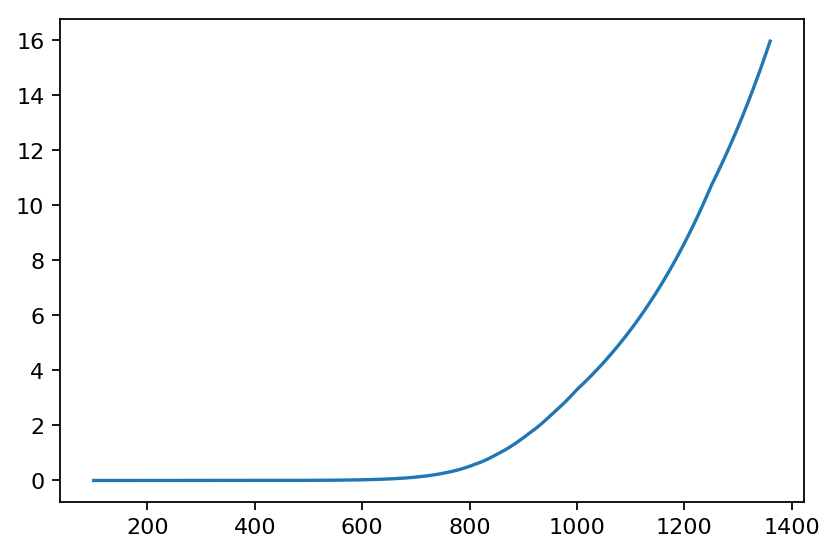

In [160]:
plt.plot(hi[:900], Ln[:900])
#plt.plot(Ln[:300]*bc2/bc1, hi[:300])
plt.show()

In [149]:
Ln[810]

316700022.21666443

In [116]:
mp = 0.040
Isp = 536
g = 9.81

In [117]:
mp*Isp*g

210.32640000000004

In [137]:
from numpy import log

In [142]:
np.exp(-2.302)

0.10005852641943393

In [133]:
Ln[810]

316700.02221666445

In [121]:
hi[810]

1235.135135135135

In [124]:
0.02*Lp(0.010190346851855398)[810]

9.5786623404248115

In [192]:
m = 7.240
CD = 2.2
A = 0.05261451671609104
R = 6378e3
bc1 = m/(CD*A)
ai = R+hi*1000
year = 3600*24*365
mu = 3.98e14
ar = 2*np.pi*rhoi*ai**2/bc1
Ln = Hi*1e3*m/(2*np.pi*rhoi*ai**2*CD*A)/(3600*24*365) #*2*np.pi*np.sqrt(ai**3/mu)

In [193]:
Lp = lambda mp: mp*Isp*g*ai/(0.5*CD*A*rhoi*mu)/year

In [194]:
Ln[800]

1.759784195571737

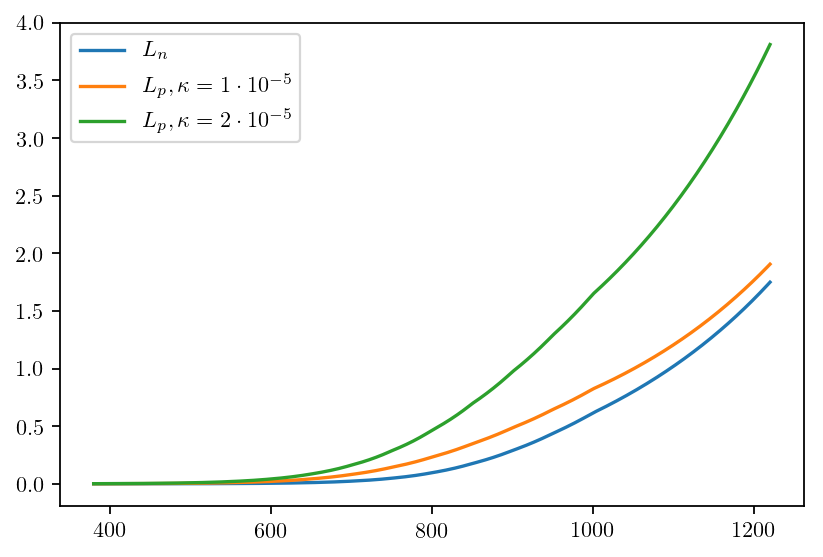

In [196]:
ub = 800
plt.rc('text', usetex=True)
plt.plot(hi[200:ub], Ln[200:ub],
         hi[200:ub], 1e-5*Lp(4.3)[200:ub], 
         hi[200:ub], 2e-5*Lp(4.3)[200:ub])
plt.legend([r"$L_n$", "$L_p, \kappa=1\cdot10^{-5}$", "$L_p, \kappa=2\cdot10^{-5}$"])
plt.show()